<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Singapore Housing Modelling - Training Code

**Information about notebook:**

The purpose of this notebook is mainly used for the fitting of the chosen regression model so that we can store the model in a .pkl file to be used on the unseen test data. 
It will contain only the essential codes required from importing of packages and the train data, to fitting of the post processed train data onto the chosen model. There will be no markdown cells for the explaination of rationale in this notebook. For further details of the rationale through the different sections, insights and summary/conclusion, please refer to "final_constance_main_code_project2.ipynb".

### 1. Importing packages & data

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modelling imports
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import statsmodels.api as sm

In [2]:
# read csv for train
df_hdb = pd.read_csv("../data/train.csv")

# see rows and columns; and details of first 5 rows
print(df_hdb.shape)
df_hdb.head(2)

C:\Users\const\AppData\Local\Temp\ipykernel_21596\976165562.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hdb = pd.read_csv("../data/train.csv")


(150634, 77)


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892


In [3]:
# check info for each column
df_hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

### 2. Data cleaning

In [4]:
# change column names to all lower case for uniformity sake
df_hdb = df_hdb.rename(columns=str.lower)

#### (a) Handling NaNs in data

In [5]:
# inspect postal column for nils with all columns shown
# to show all columns and not truncate them 
pd.set_option("display.max_columns", 80)
df_hdb[df_hdb["postal"] == "NIL"]

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
880,162698,2021-03,CHOA CHU KANG,4 ROOM,215,CHOA CHU KANG CTRL,01 TO 03,104.0,Model A,1990,438000.0,2021,3,2,1,3,2,4 ROOM Model A,"215, CHOA CHU KANG CTRL",1119.456,31,11,1989,Y,Y,N,N,N,90,0,0,0,90,0,0,0,0,0,0,0,0,NIL,1.383083,103.747077,Choa Chu Kang,300.156625,1.0,3.0,10.0,2871.503494,NaN,NaN,NaN,28,45,432.920382,Choa Chu Kang,1,1,1.385711,103.744203,138.812914,Aft Blk 202,1.382890,103.74831,148.271667,South View Primary School,38,0,1.381767,103.747290,550.431376,Chua Chu Kang Secondary School,211,0,1.383275,103.752025
3030,162653,2015-10,SENGKANG,5 ROOM,238,COMPASSVALE WALK,04 TO 06,122.0,Improved,1999,450000.0,2015,10,5,4,6,5,5 ROOM Improved,"238, COMPASSVALE WALK",1313.208,22,16,1998,Y,N,N,N,N,137,0,0,0,92,45,0,0,0,0,0,0,0,NIL,1.390440,103.898664,Sengkang,448.929181,1.0,3.0,6.0,2449.012307,NaN,NaN,NaN,40,0,394.275271,Sengkang,1,1,1.392440,103.895735,117.388688,Blk 240,1.391018,103.89778,163.462621,Seng Kang Primary School,87,0,1.389250,103.899528,459.867211,CHIJ Saint Joseph's Convent,232,0,1.391781,103.902577
5793,162659,2012-08,SENGKANG,5 ROOM,238,COMPASSVALE WALK,16 TO 18,116.0,Improved,1999,540000.0,2012,8,17,16,18,17,5 ROOM Improved,"238, COMPASSVALE WALK",1248.624,22,16,1998,Y,N,N,N,N,137,0,0,0,92,45,0,0,0,0,0,0,0,NIL,1.390440,103.898664,Sengkang,448.929181,1.0,3.0,6.0,2449.012307,NaN,NaN,NaN,40,0,394.275271,Sengkang,1,1,1.392440,103.895735,117.388688,Blk 240,1.391018,103.89778,163.462621,Seng Kang Primary School,87,0,1.389250,103.899528,459.867211,CHIJ Saint Joseph's Convent,232,0,1.391781,103.902577
7849,162661,2013-04,SENGKANG,5 ROOM,238,COMPASSVALE WALK,04 TO 06,116.0,Improved,1999,533888.0,2013,4,5,4,6,5,5 ROOM Improved,"238, COMPASSVALE WALK",1248.624,22,16,1998,Y,N,N,N,N,137,0,0,0,92,45,0,0,0,0,0,0,0,NIL,1.390440,103.898664,Sengkang,448.929181,1.0,3.0,6.0,2449.012307,NaN,NaN,NaN,40,0,394.275271,Sengkang,1,1,1.392440,103.895735,117.388688,Blk 240,1.391018,103.89778,163.462621,Seng Kang Primary School,87,0,1.389250,103.899528,459.867211,CHIJ Saint Joseph's Convent,232,0,1.391781,103.902577
9804,162699,2012-05,CHOA CHU KANG,4 ROOM,215,CHOA CHU KANG CTRL,06 TO 10,104.0,Model A,1990,430000.0,2012,5,8,6,10,8,4 ROOM Model A,"215, CHOA CHU KANG CTRL",1119.456,31,11,1989,Y,Y,N,N,N,90,0,0,0,90,0,0,0,0,0,0,0,0,NIL,1.383083,103.747077,Choa Chu Kang,300.156625,1.0,3.0,10.0,2871.503494,NaN,NaN,NaN,28,45,432.920382,Choa Chu Kang,1,1,1.385711,103.744203,138.812914,Aft Blk 202,1.382890,103.74831,148.271667,South View Primary School,38,0,1.381767,103.747290,550.431376,Chua Chu Kang Secondary School,211,0,1.383275,103.752025
14007,162641,2019-09,SENGKANG,4 ROOM,238,COMPASSVALE WALK,13 TO 15,101.0,Model A,1999,412000.0,2019,9,14,13,15,14,4 ROOM Model A,"238, COMPASSVALE WALK",1087.164,22,16,1998,Y,N,N,N,N,137,0,0,0,92,45,0,0,0,0,0,0,0,NIL,1.390440,103.898664,Sengkang,448.929181,1.0,3.0,6.0,2449.012307,NaN,NaN,NaN,40,0,394.275271,Sengkang,1,1,1.392440,103

In [6]:
# fill in the postal code for the missing places since only 2 locations
# we can easily find the postal code based on the address and block numbers
df_hdb.loc[df_hdb["address"] == "215, CHOA CHU KANG CTRL", "postal"] = "680215"
df_hdb.loc[df_hdb["address"] == "238, COMPASSVALE WALK", "postal"] = "540238"

In [7]:
# check if they are all filled in
# searching for NIL should return no results
df_hdb[df_hdb["postal"] == "NIL"]

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude


In [8]:
# inspect mall nearest distance column for blank fields
df_hdb["mall_nearest_distance"].replace("",np.NaN)
print(df_hdb["mall_nearest_distance"].isnull().sum())

# drop these rows as we cannot estimate the distances to impute accurate values in
df_hdb.dropna(subset = ["mall_nearest_distance"], inplace = True)

829


In [9]:
# check shape to see if 829 rows are dropped
df_hdb.shape

(149805, 77)

In [10]:
# inspected csv and found nan values for the following columns
# check the columns out to confirm
print(df_hdb["mall_within_500m"].unique())
print(df_hdb["mall_within_1km"].unique())
print(df_hdb["mall_within_2km"].unique())
print(df_hdb["hawker_within_500m"].unique())
print(df_hdb["hawker_within_1km"].unique())
print(df_hdb["hawker_within_2km"].unique())

[nan  1.  3.  4.  2.  5.  6.]
[nan  1.  3.  2.  5.  4. 11.  6. 10.  7. 15. 14.  8.  9. 12. 13.]
[ 7.  3.  4.  2.  6.  8.  1.  5. 27. 10.  9. 30. 20. 24. nan 11. 12. 14.
 21. 43. 26. 28. 13. 22. 25. 29. 33. 31. 17. 18. 23. 38. 34. 16. 32. 42.
 37. 19. 39. 40. 15. 35.]
[ 1. nan  2.  3.  4.  5.]
[ 3.  1. nan  5.  2.  4.  6.  8.  9.  7.]
[13.  7.  1.  9. 11.  4.  5.  3. 15.  2. 10. 12. nan  8. 14.  6. 16. 17.
 18. 19.]


In [11]:
# fill NaNs with 0 
df_hdb.fillna(0, inplace=True)

In [12]:
# to confirm NaNs replaced with 0 successfully
print(df_hdb["mall_within_500m"].unique())
print(df_hdb["mall_within_1km"].unique())
print(df_hdb["mall_within_2km"].unique())
print(df_hdb["hawker_within_500m"].unique())
print(df_hdb["hawker_within_1km"].unique())
print(df_hdb["hawker_within_2km"].unique())

[0. 1. 3. 4. 2. 5. 6.]
[ 0.  1.  3.  2.  5.  4. 11.  6. 10.  7. 15. 14.  8.  9. 12. 13.]
[ 7.  3.  4.  2.  6.  8.  1.  5. 27. 10.  9. 30. 20. 24.  0. 11. 12. 14.
 21. 43. 26. 28. 13. 22. 25. 29. 33. 31. 17. 18. 23. 38. 34. 16. 32. 42.
 37. 19. 39. 40. 15. 35.]
[1. 0. 2. 3. 4. 5.]
[3. 1. 0. 5. 2. 4. 6. 8. 9. 7.]
[13.  7.  1.  9. 11.  4.  5.  3. 15.  2. 10. 12.  0.  8. 14.  6. 16. 17.
 18. 19.]


#### (b) Converting column values to boolean

In [13]:
# change columns 23 -27 to boolean values for uniformity through our dataset
# Y = 1 , N = 0

df_hdb["residential"] = df_hdb["residential"].map({'Y': 1, 'N': 0})
df_hdb["commercial"] = df_hdb["commercial"].map({'Y': 1, 'N': 0})
df_hdb["market_hawker"] = df_hdb["market_hawker"].map({'Y': 1, 'N': 0})
df_hdb["multistorey_carpark"] = df_hdb["multistorey_carpark"] .map({'Y': 1, 'N': 0})
df_hdb["precinct_pavilion"] = df_hdb["precinct_pavilion"].map({'Y': 1, 'N': 0})

In [14]:
# change all rental to boolean values
# have rental units = 1, no rental units = 0
has_rental = (df_hdb[['1room_rental', '2room_rental', '3room_rental', 'other_room_rental']].sum(axis=1) > 0).astype(int) 
df_hdb.insert(loc = 1, column = "rental_units_in_blk", value = has_rental)

In [15]:
# check the df for new column "rental_units_in_blk" and respective columns in boolean instead of Y/N
pd.set_option("display.max_columns", 80)
df_hdb.head()

,id,rental_units_in_blk,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,0,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,15,25,2005,1,0,0,0,0,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,0,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,34,9,1987,1,0,0,0,0,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,0,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,24,16,1996,1,0,0,0,0,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,0,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,29,11,1990,1,1,0,0,0,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,0,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,34,4,1987,1,0,0,0,0,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


#### (c) Converting column values to the correct dtype

In [16]:
# convert tranc_month to object 
df_hdb["tranc_month"] = df_hdb["tranc_month"].astype("object")

In [17]:
# convert id to object 
df_hdb["id"] = df_hdb["id"].astype("object")

#### (d) Feature engineering of new column(s)

In [18]:
# create new column for hdb_age_left
# this is to show the remaining years left on the lease as of the year transacted
hdb_lease = (df_hdb["tranc_year"] - df_hdb["lease_commence_date"])
df_hdb.insert(loc = 1, column = "hdb_age_when_sold", value = hdb_lease)

In [19]:
# create new column for flat density
dwelling = (df_hdb["total_dwelling_units"] / df_hdb["max_floor_lvl"])
df_hdb.insert(loc = 1, column = "dwelling_density", value = dwelling)

#### (e) Reorganizing categories in flat_model and town columns

In [20]:
# reorganise flat models into bigger categories
regrouped_values = {"Model A": "Model A",
                  "Improved": "Improved",
                  "New Generation": "New Generation",
                  "Premium Apartment": "Apartment",
                  "Simplified": "Simplified",
                  "Apartment": "Apartment",
                  "Standard": "Standard",
                  "Maisonette": "Maisonette",
                  "Model A2": "Model A",
                  "DBSS": "DBSS",
                  "Model A-Maisonette": "Maisonette",
                  "Adjoined flat": "Adjoined flat",
                  "Type S1": "Type S",
                  "Type S2": "Type S",
                  "Terrace" : "Terrace",
                  "Premium Apartment Loft": "Maisonette",
                  "Improved-Maisonette": "Maisonette",
                  "Premium Maisonette": "Maisonette",
                  "2-room": "2-room"}

df_hdb = df_hdb.replace({'flat_model': regrouped_values})

# see updated categories of flat models
df_hdb['flat_model'].unique()

array(['Model A', 'Improved', 'Apartment', 'Simplified', 'New Generation',
       'Maisonette', 'Standard', 'DBSS', 'Terrace', 'Type S',
       'Adjoined flat', 'Multi Generation', '2-room'], dtype=object)

In [21]:
# reorganise flat type into bigger categories

town_region_mapping = {"SEMBAWANG": "north",
                  "WOODLANDS": "north",
                  "YISHUN": "north",
                  "ANG MO KIO": "north-east mature",
                  "HOUGANG": "north-east",
                  "PUNGGOL": "north-east",
                  "SENGKANG": "north-east",
                  "SERANGOON": "north-east mature",
                  "BEDOK": "east mature",
                  "PASIR RIS": "east mature",
                  "TAMPINES": "east mature",
                  "BUKIT BATOK": "west",
                  "BUKIT PANJANG": "west",
                  "CHOA CHU KANG": "west",
                  "CLEMENTI": "west mature",
                  "JURONG EAST": "west",
                  "JURONG WEST": "west",
                  "BISHAN": "central mature",
                  "BUKIT MERAH": "central mature",
                  "BUKIT TIMAH": "central mature",
                  "CENTRAL AREA": "central mature",
                  "GEYLANG": "central mature",
                  "KALLANG/WHAMPOA": "central mature",
                  "MARINE PARADE": "central mature",
                  "QUEENSTOWN": "central mature",
                  "TOA PAYOH": "central mature"
                }
town_region = df_hdb["town"].map(town_region_mapping)
df_hdb.insert(loc = 1, column = "town_region", value = town_region)

#### (f) Dropping of unncessary columns from the dataframe

In [22]:
# drop columns that show correlated information/ not useful to be a feature based on first understanding of data dictionary

df_hdb.drop(["tranc_yearmonth","block","street_name","address", "postal", 
             "latitude", "longitude", "planning_area","lease_commence_date","hdb_age",
             "year_completed","floor_area_sqm","full_flat_type","total_dwelling_units","max_floor_lvl",
             "1room_sold","2room_sold","3room_sold","4room_sold","5room_sold",
             "exec_sold","multigen_sold","studio_apartment_sold","1room_rental","2room_rental",
             "3room_rental","other_room_rental","mrt_name","mrt_latitude","mrt_longitude",
             "bus_stop_name","bus_stop_latitude","bus_stop_longitude","pri_sch_name","pri_sch_latitude",
             "pri_sch_longitude","sec_sch_name","sec_sch_longitude","sec_sch_latitude","market_hawker",
             "storey_range","town"],
             axis='columns', inplace=True) 


# check shape to ensure columns dropped 
df_hdb.shape

(149805, 39)

In [23]:
pd.set_option("display.max_columns", 80)
df_hdb.head(2)

,id,town_region,dwelling_density,hdb_age_when_sold,rental_units_in_blk,flat_type,flat_model,resale_price,tranc_year,tranc_month,mid_storey,lower,upper,mid,floor_area_sqft,residential,commercial,multistorey_carpark,precinct_pavilion,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation
0,88471,central mature,5.680000,10,0,4 ROOM,Model A,680000.0,2016,5,11,10,12,11,968.76,1,0,0,0,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,0,0,29.427395,1138.633422,78,1,1138.633422,224,0
1,122598,central mature,12.444444,25,0,5 ROOM,Improved,665000.0,2012,7,8,7,9,8,1399.32,1,0,0,0,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,1,1,58.207761,415.607357,45,1,447.894399,232,0


In [24]:
# check updated info on df after initial data cleaning
df_hdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149805 entries, 0 to 150633
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         149805 non-null  object 
 1   town_region                149805 non-null  object 
 2   dwelling_density           149805 non-null  float64
 3   hdb_age_when_sold          149805 non-null  int64  
 4   rental_units_in_blk        149805 non-null  int32  
 5   flat_type                  149805 non-null  object 
 6   flat_model                 149805 non-null  object 
 7   resale_price               149805 non-null  float64
 8   tranc_year                 149805 non-null  int64  
 9   tranc_month                149805 non-null  object 
 10  mid_storey                 149805 non-null  int64  
 11  lower                      149805 non-null  int64  
 12  upper                      149805 non-null  int64  
 13  mid                        149805 

### 3. Initial EDA

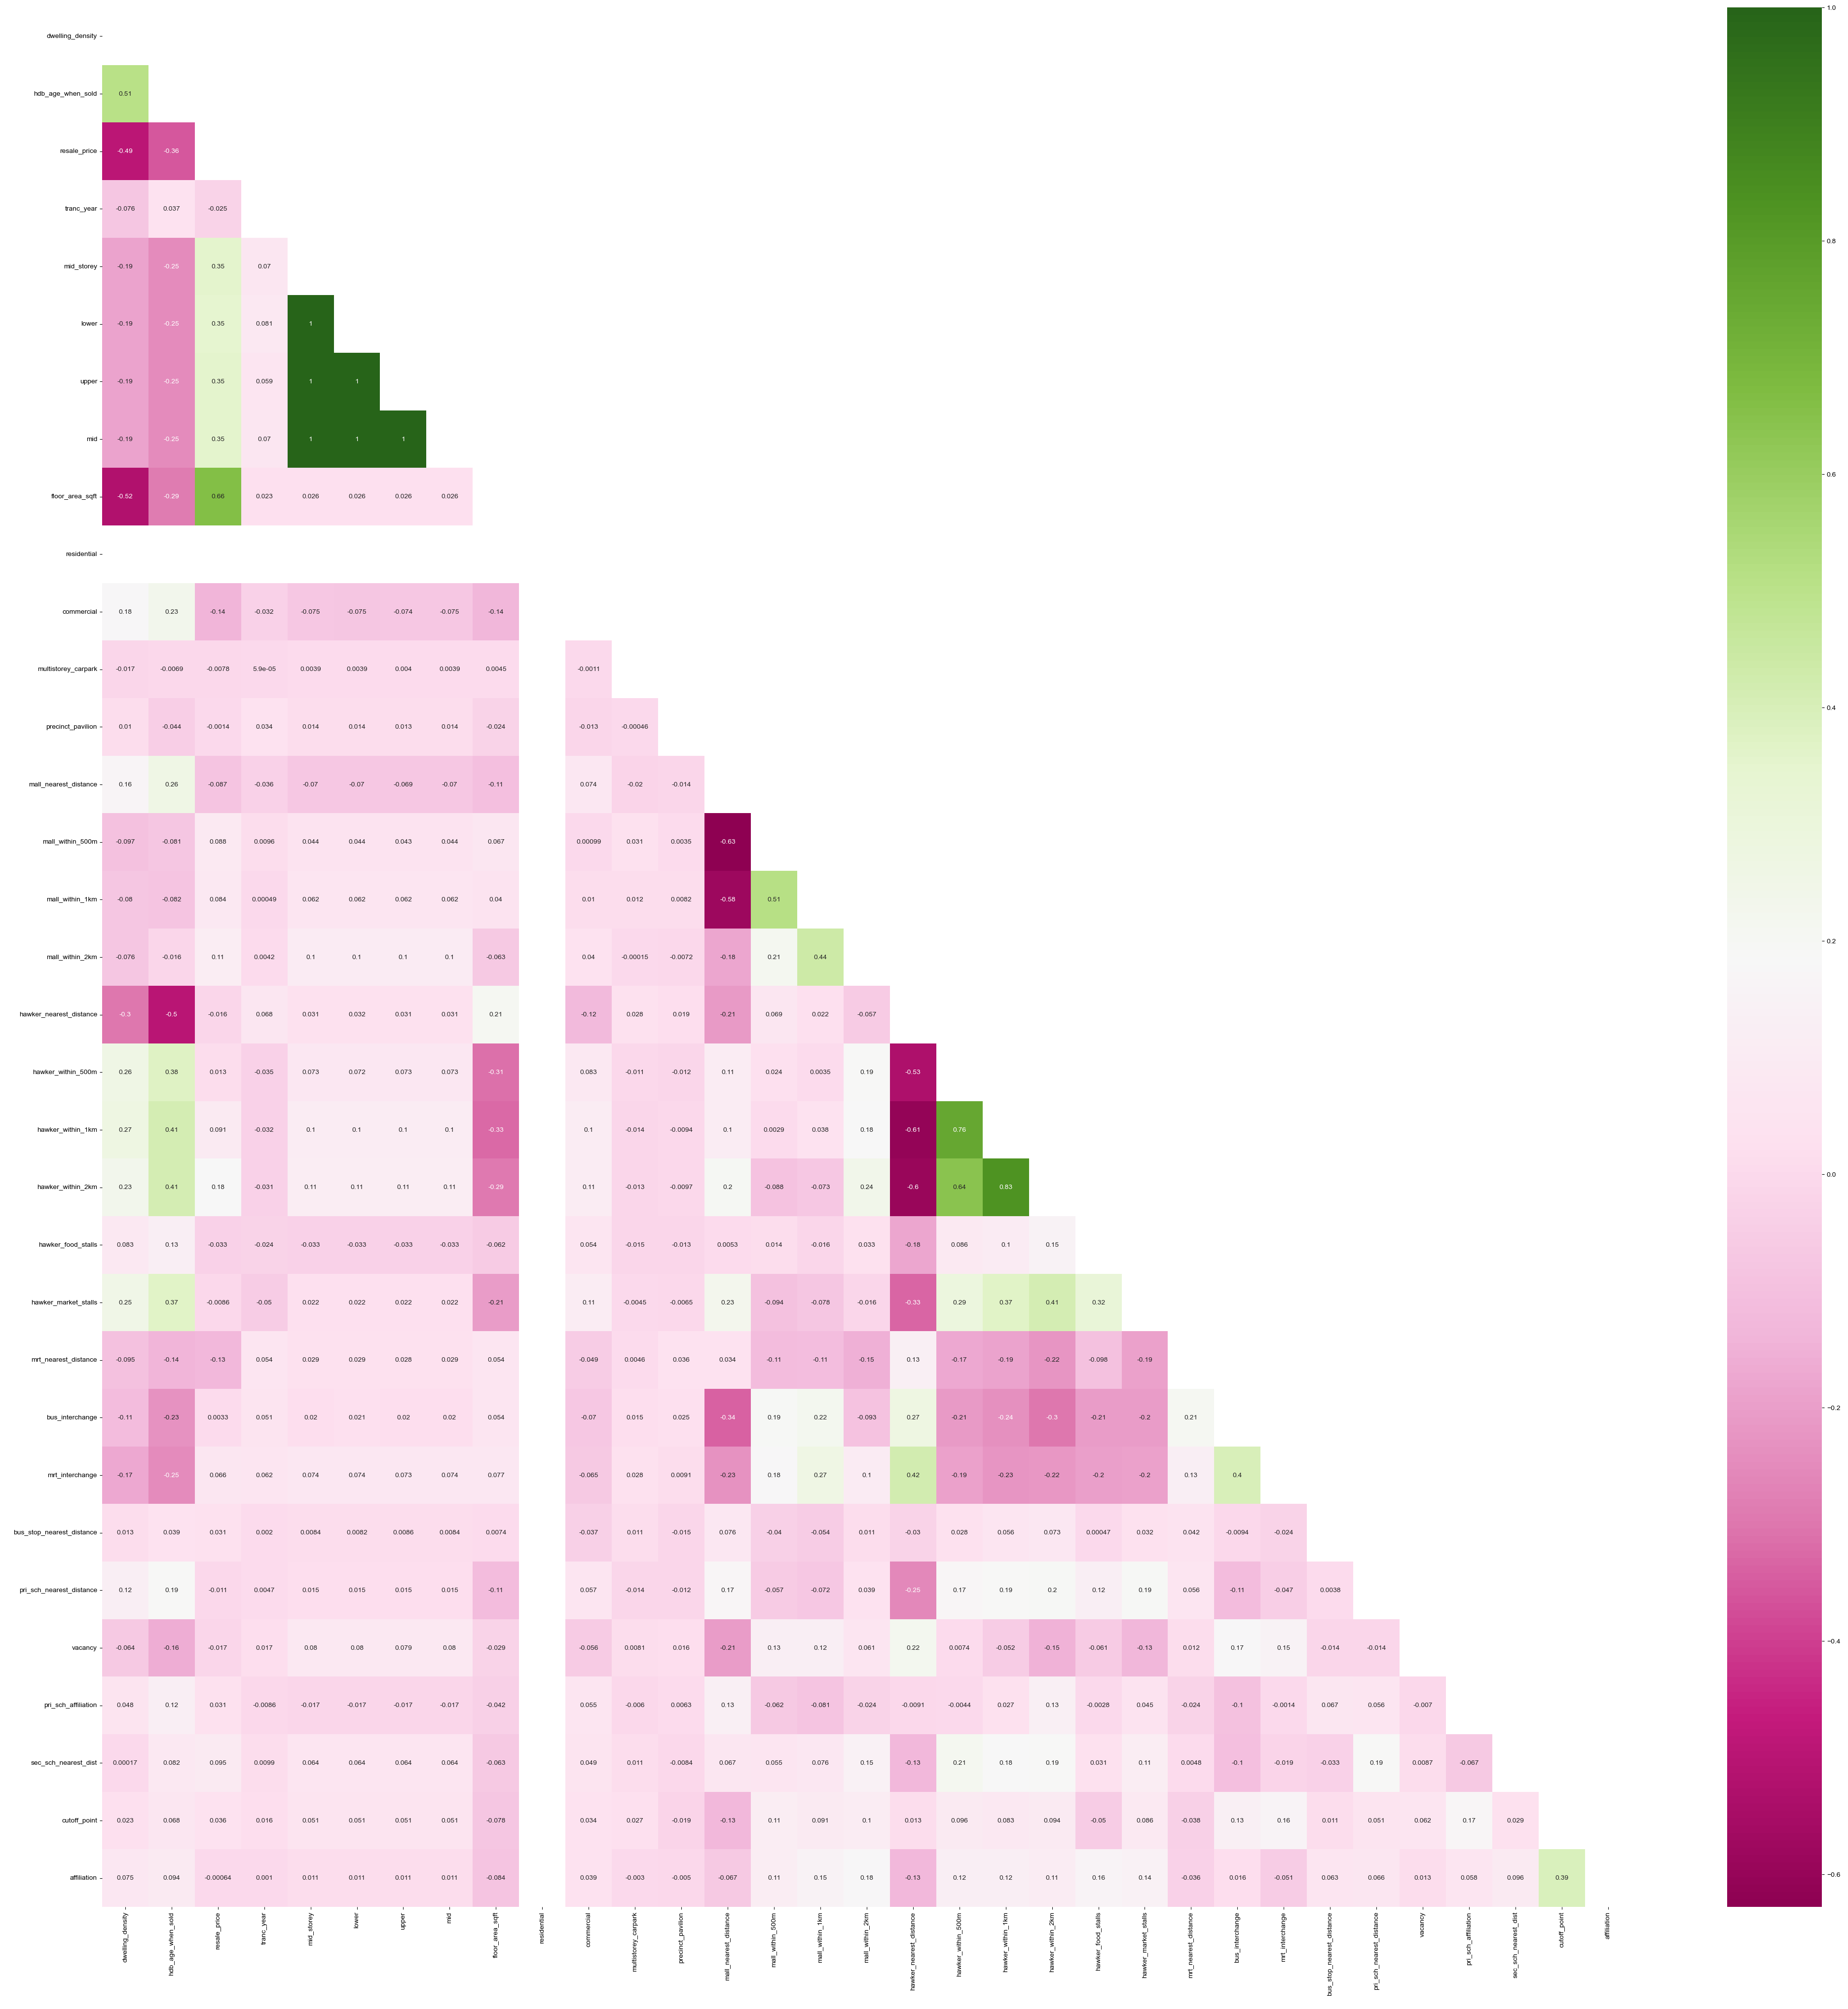

In [25]:
# to do initial correlation heatmap to see possible correlation between remaining numerical variables
# set up mask to be "True" in the upper triangle since it will be symmetrical

mask = np.zeros_like(df_hdb.select_dtypes(include=["int64","float64"]).corr(numeric_only = True))
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (50,50))
sns.heatmap(df_hdb.select_dtypes(include=["int64","float64"]).corr(numeric_only=True), mask = mask, annot = True, cmap="PiYG")
sns.set(rc={'figure.figsize':(50,50),
            "xtick.bottom" : True, "ytick.left" : True})

In [26]:
# drop further columns
df_hdb.drop(["lower","upper","mid","residential",
             "hawker_within_500m","hawker_within_1km",
             "mall_within_500m", "mall_within_1km"], axis='columns', inplace=True) 

# check shape to ensure columns dropped 
df_hdb.shape

(149805, 31)

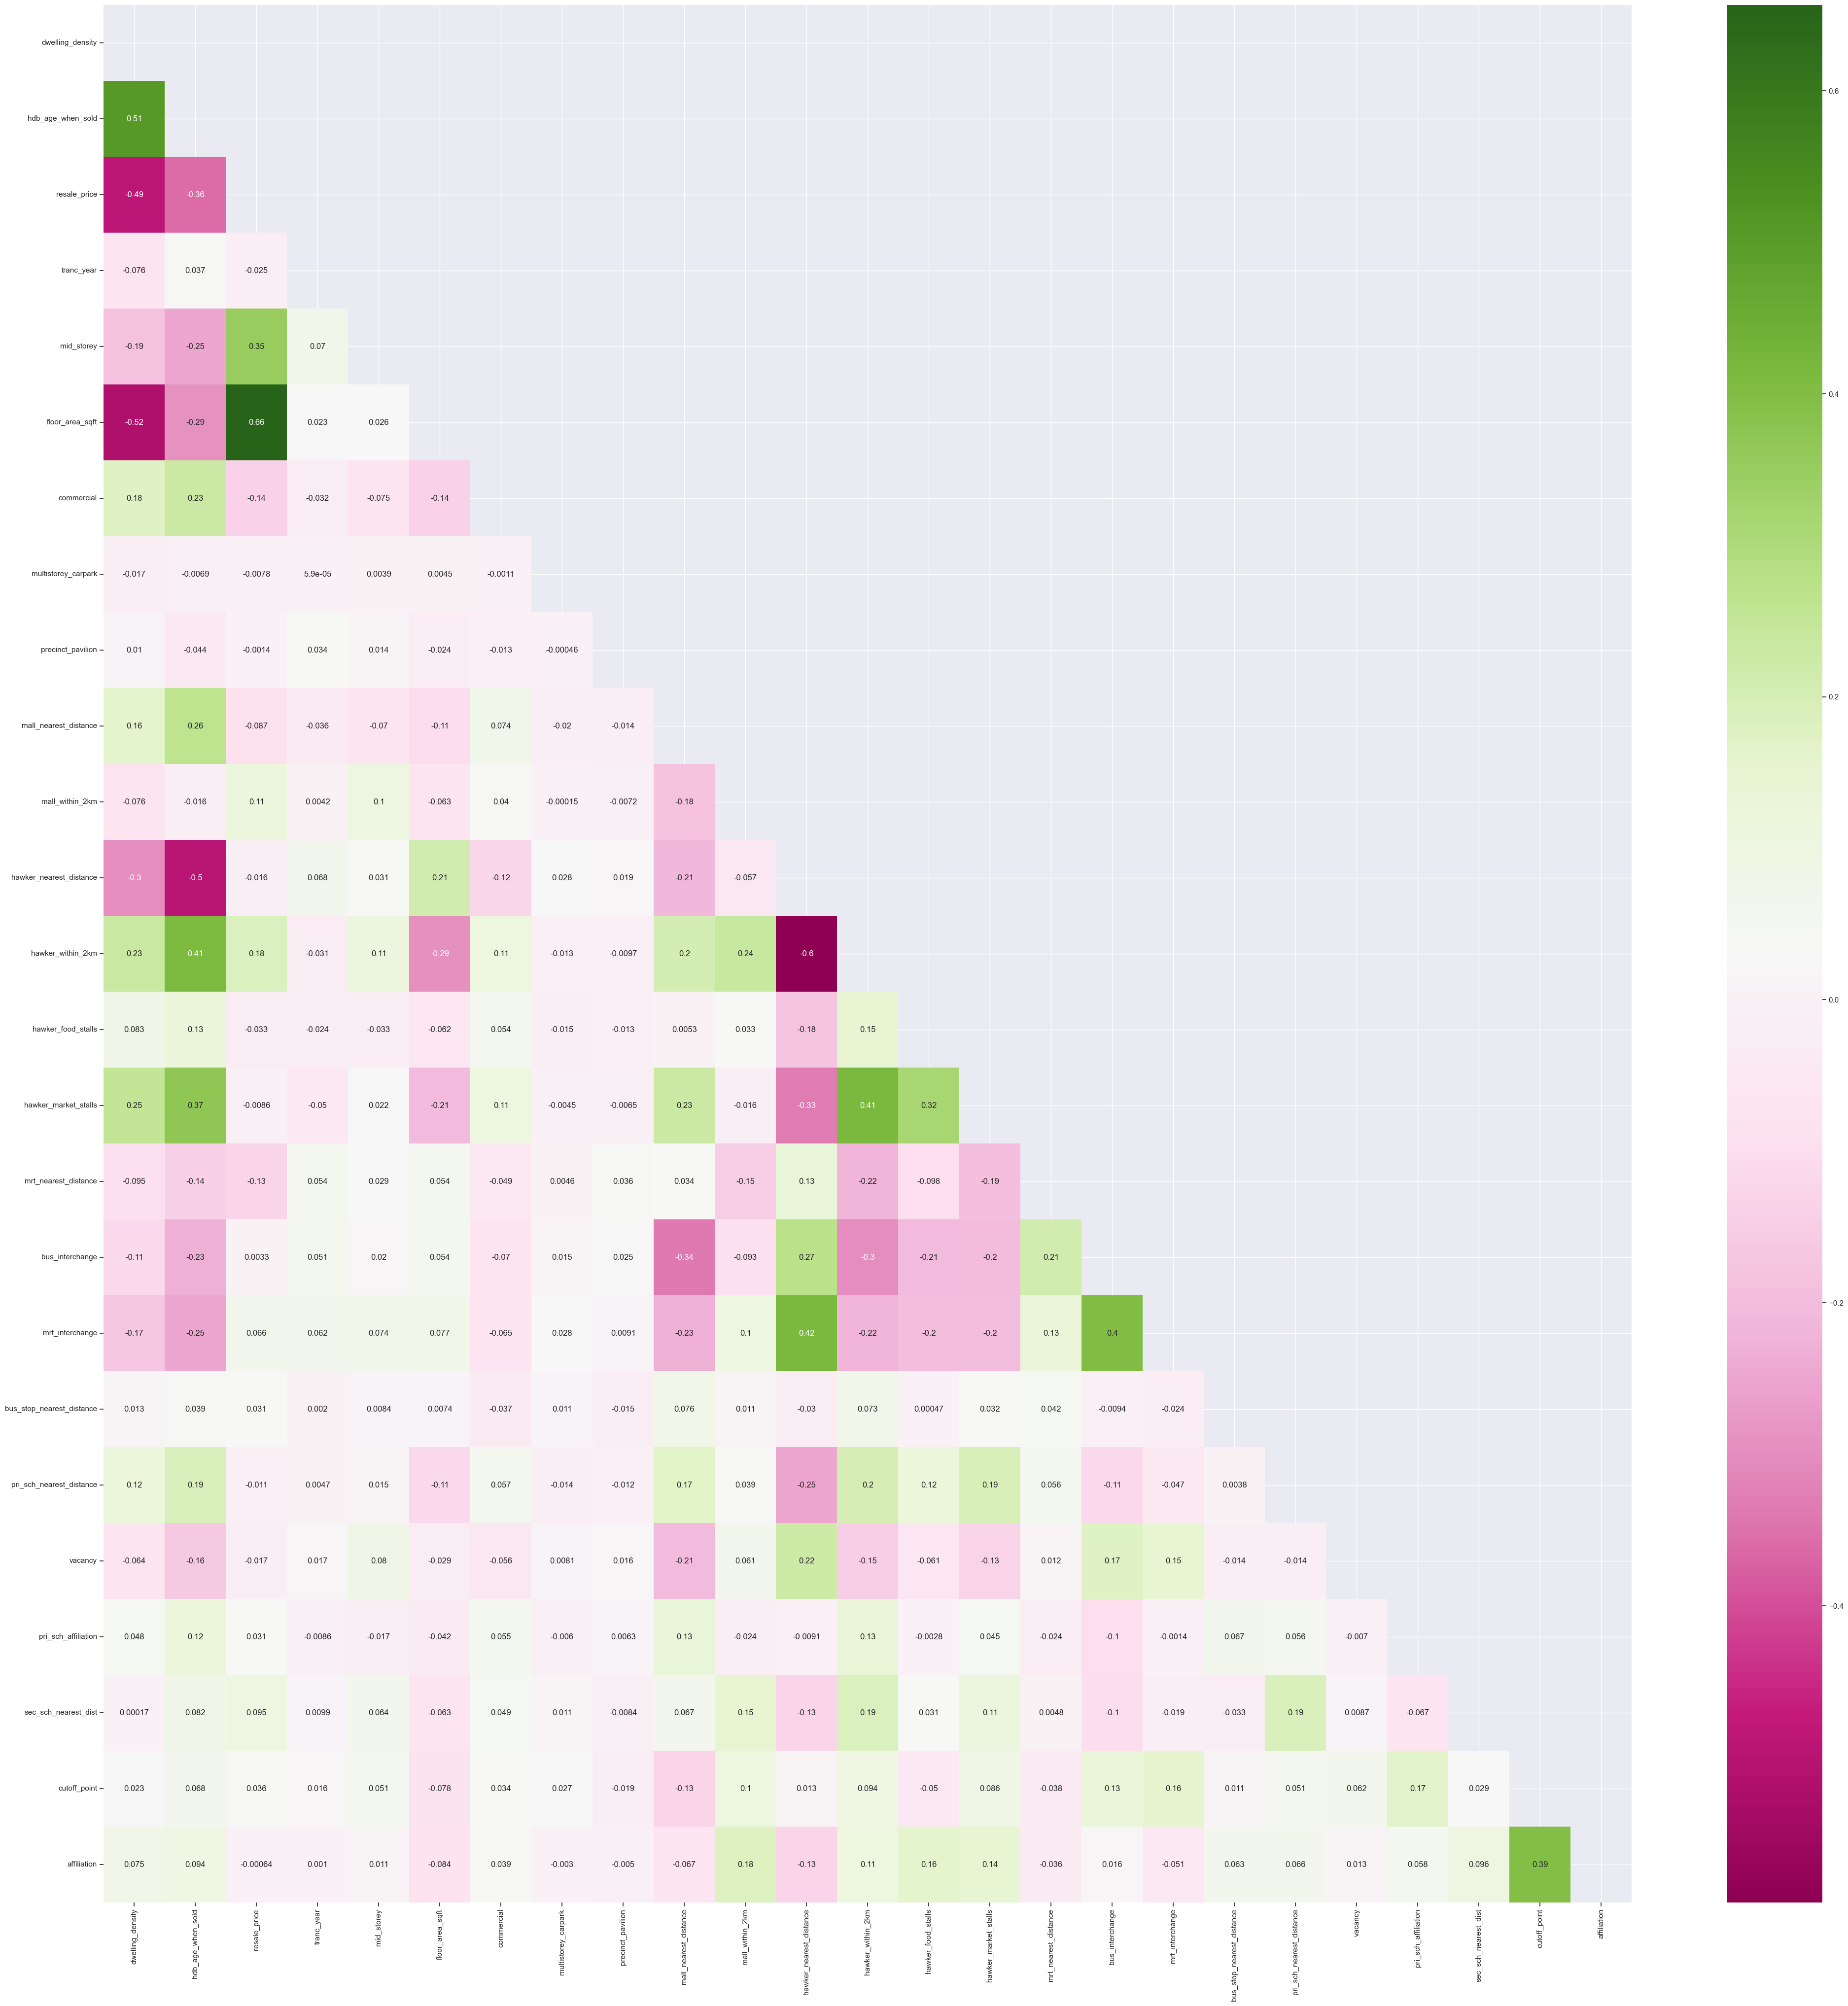

In [27]:
# recheck the heatmap
# set up mask to be "True" in the upper triangle since it will be symmetrical

mask = np.zeros_like(df_hdb.select_dtypes(include=["int64","float64"]).corr(numeric_only = True))
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (50,50))
sns.heatmap(df_hdb.select_dtypes(include=["int64","float64"]).corr(numeric_only=True), mask = mask, annot = True, cmap="PiYG")
sns.set(rc={'figure.figsize':(50,50),
            "xtick.bottom" : True, "ytick.left" : True})

In [28]:
# check the updated df info after second round of data cleaning
df_hdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149805 entries, 0 to 150633
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         149805 non-null  object 
 1   town_region                149805 non-null  object 
 2   dwelling_density           149805 non-null  float64
 3   hdb_age_when_sold          149805 non-null  int64  
 4   rental_units_in_blk        149805 non-null  int32  
 5   flat_type                  149805 non-null  object 
 6   flat_model                 149805 non-null  object 
 7   resale_price               149805 non-null  float64
 8   tranc_year                 149805 non-null  int64  
 9   tranc_month                149805 non-null  object 
 10  mid_storey                 149805 non-null  int64  
 11  floor_area_sqft            149805 non-null  float64
 12  commercial                 149805 non-null  int64  
 13  multistorey_carpark        149805 

<Figure size 3000x2000 with 0 Axes>

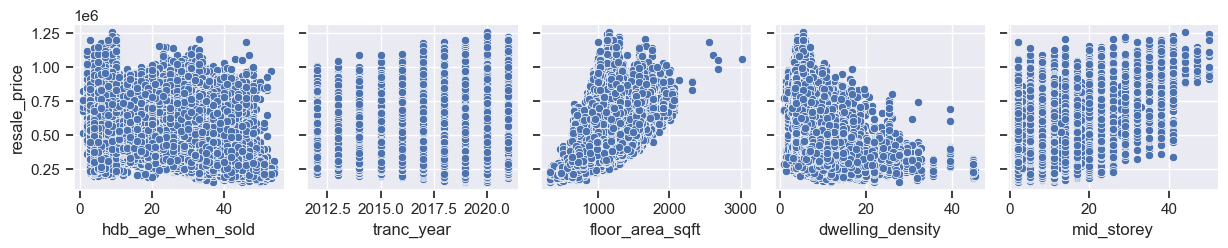

In [29]:
# to see pairplots of our numerical columns vs resale price
# we will group into resale flat related specifications vs amenities

# this is for resale flat related specifications
plt.figure(figsize=(30,20))
sns.pairplot(df_hdb,  
             y_vars=["resale_price"], 
             x_vars=["hdb_age_when_sold", "tranc_year","floor_area_sqft","dwelling_density","mid_storey"]);

<Figure size 2500x2000 with 0 Axes>

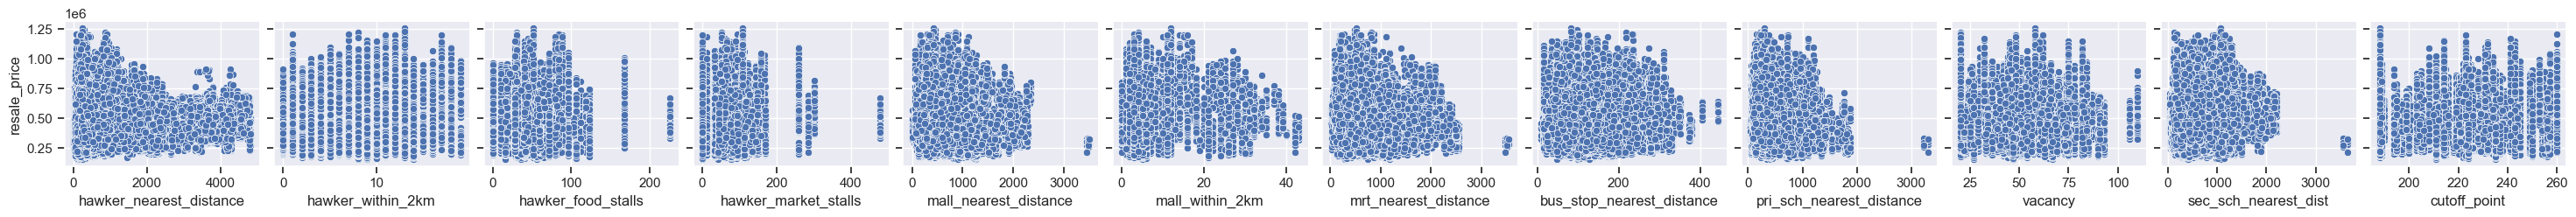

In [30]:
# to see pairplots of our numerical columns vs resale price
# we will group into resale flat related vs amenities

# this is for amenities near resale flat
plt.figure(figsize=(25,20))
sns.pairplot(df_hdb,
             y_vars=["resale_price"], 
             x_vars = ["hawker_nearest_distance","hawker_within_2km","hawker_food_stalls","hawker_market_stalls",
                       "mall_nearest_distance","mall_within_2km","mrt_nearest_distance","bus_stop_nearest_distance",
                       "pri_sch_nearest_distance","vacancy","sec_sch_nearest_dist","cutoff_point"]);

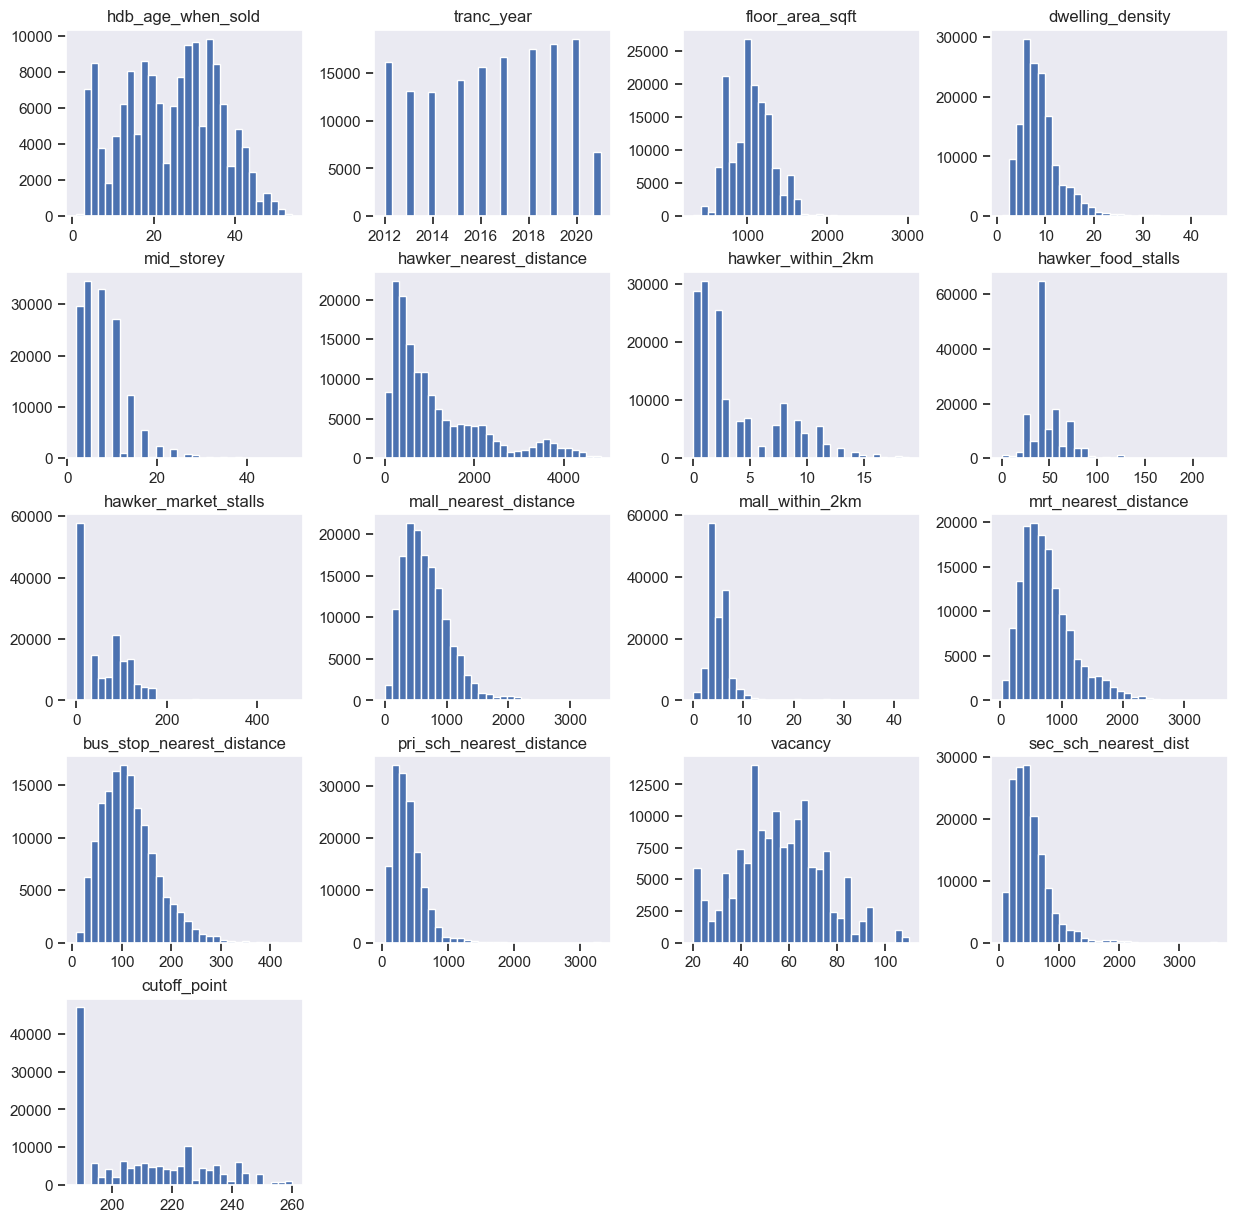

In [31]:
# to see distribution of our numerical columns (excluding boolean-ed columns)
df_hdb.hist(column = ["hdb_age_when_sold", "tranc_year","floor_area_sqft","dwelling_density","mid_storey",
                       "hawker_nearest_distance","hawker_within_2km","hawker_food_stalls","hawker_market_stalls",
                       "mall_nearest_distance","mall_within_2km","mrt_nearest_distance","bus_stop_nearest_distance",
                       "pri_sch_nearest_distance","vacancy","sec_sch_nearest_dist","cutoff_point"], grid = False, figsize = (15, 15), bins = 30)

plt.show();

### 4. Further EDA / Preliminary plots

In [32]:
# summary statistics
# catgorical columns not included 
df_hdb.describe().T

,count,mean,std,min,25%,50%,75%,max
dwelling_density,149805.0,8.842310,4.197939,1.000000,5.725000,7.750000,10.923077,4.536364e+01
hdb_age_when_sold,149805.0,24.149875,11.824823,1.000000,15.000000,25.000000,33.000000,5.400000e+01
rental_units_in_blk,149805.0,0.036821,0.188323,0.000000,0.000000,0.000000,0.000000,1.000000e+00
resale_price,149805.0,448662.064255,143212.531062,150000.000000,346000.000000,420000.000000,520000.000000,1.258000e+06
tranc_year,149805.0,2016.466513,2.742246,2012.000000,2014.000000,2017.000000,2019.000000,2.021000e+03
mid_storey,149805.0,8.263609,5.482182,2.000000,5.000000,8.000000,11.000000,5.000000e+01
floor_area_sqft,149805.0,1046.562426,263.060119,333.684000,807.300000,1022.580000,1205.568000,3.013920e+03
commercial,149805.0,0.191930,0.393819,0.000000,0.000000,0.000000,0.000000,1.000000e+00
multistorey_carpark,149805.0,0.000280,0.016742,0.000000,0.000000,0.000000,0.000000,1.000000e+00
precinct_pavilion,149805.0,0.000754,0.027455,0.000000,0.000000,0.000000,0.000000,1.000000e+00


#### (a) Explore relationship of flat type and resale price

C:\Users\const\AppData\Local\Temp\ipykernel_21596\4284763670.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


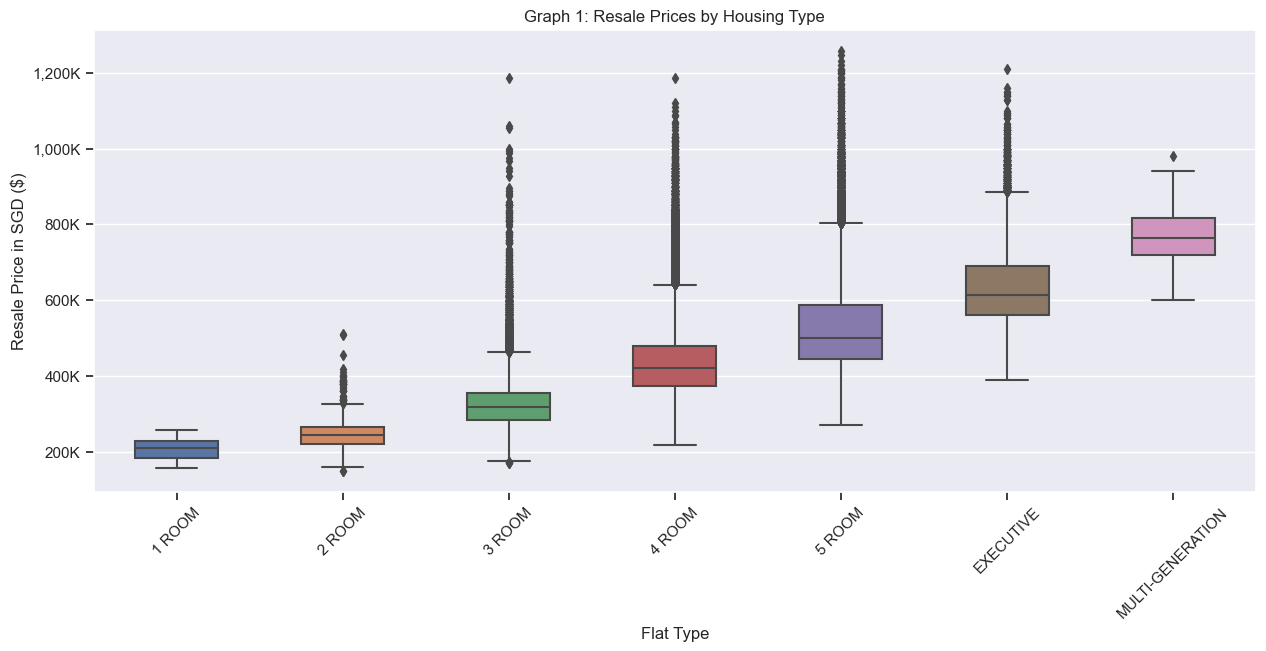

In [33]:
# boxplot to see resale price by flat type
plt.figure(figsize = (15,6))
p = sns.boxplot(x ="flat_type", y = "resale_price", data = df_hdb, width = 0.5,
                order = df_hdb.groupby("flat_type")["resale_price"].median().sort_values().reset_index()["flat_type"].tolist())
plt.suptitle('') # to remove the default title given by sns

# setting the resale price labels on the y-axis
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)

# setting the x-axis label rotation
plt.xticks(rotation=45)

# set title for graph, both axes label
plt.ylabel("Resale Price in SGD ($)")
plt.xlabel("Flat Type")
plt.title("Graph 1: Resale Prices by Housing Type")
plt.show();

In [34]:
# check the number of flats for different flat types
df_hdb["flat_type"].value_counts()

flat_type
4 ROOM              60657
3 ROOM              38905
5 ROOM              36232
EXECUTIVE           11986
2 ROOM               1887
1 ROOM                 82
MULTI-GENERATION       56
Name: count, dtype: int64

In [35]:
# check the median price of different flat types
df_hdb.groupby("flat_type")["resale_price"].median()

flat_type
1 ROOM              209000.0
2 ROOM              245000.0
3 ROOM              318000.0
4 ROOM              420000.0
5 ROOM              500000.0
EXECUTIVE           615000.0
MULTI-GENERATION    765500.0
Name: resale_price, dtype: float64

C:\Users\const\AppData\Local\Temp\ipykernel_21596\2604126938.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


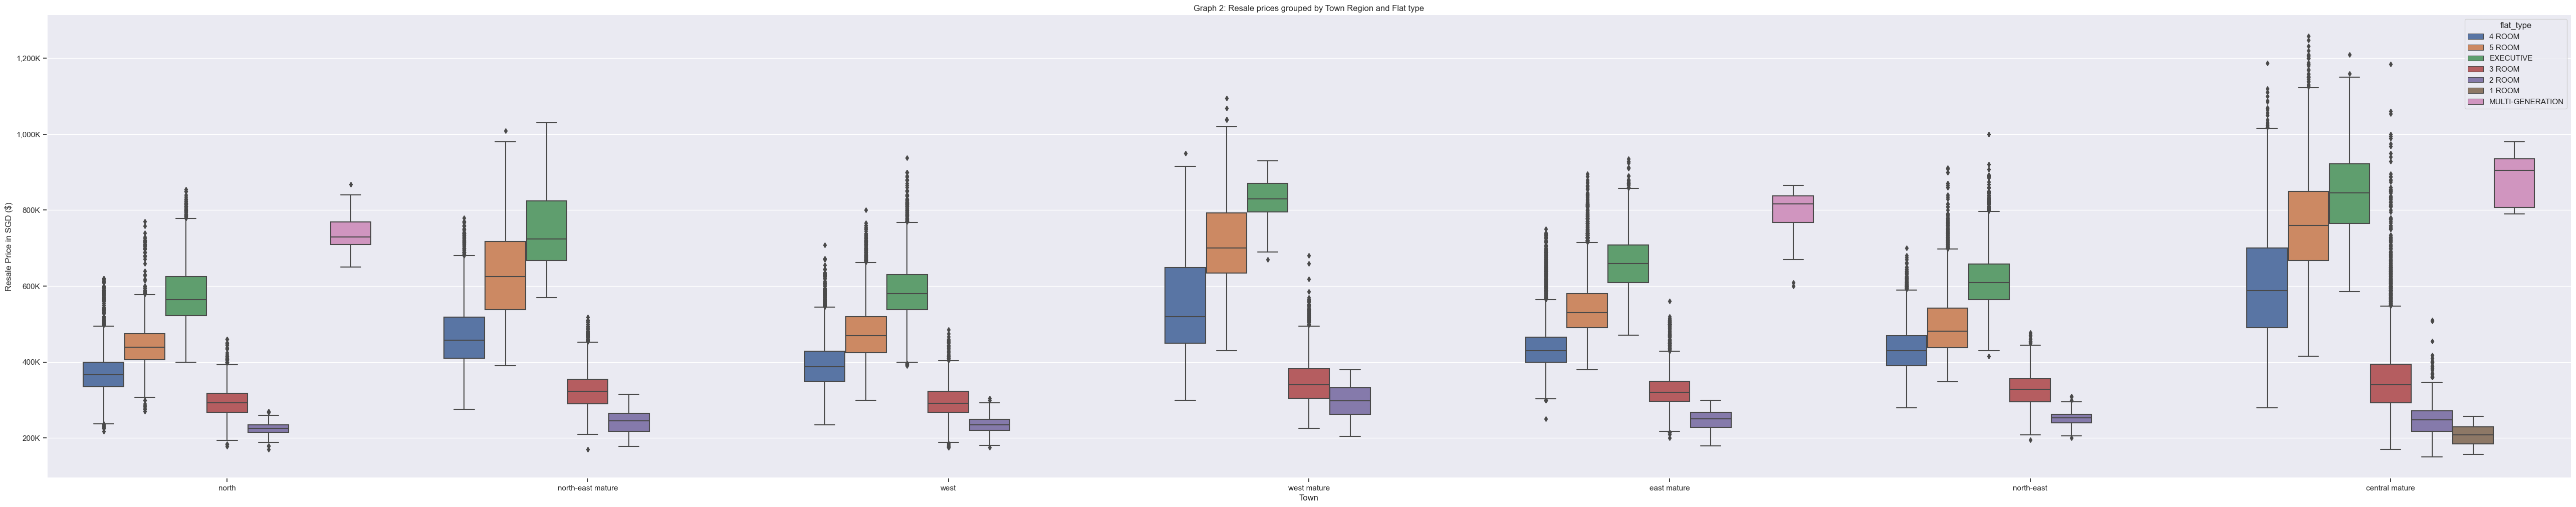

In [36]:
# plot boxplot of resale prices grouped by town and flat type
plt.figure(figsize = (65,12))

# order the plots by median from smallest to largest
order = df_hdb.groupby("town_region")["resale_price"].median().sort_values().reset_index()["town_region"].tolist()

# boxplot
p = sns.boxplot(data = df_hdb, x = "town_region", y = "resale_price", hue = "flat_type", order = order) #whis = (0,100)

# setting the resale price labels on the y-axis
ylabels = ["{:,.0f}".format(x) + "K" for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)

# add in labels for axes and titles for plot
plt.title("Graph 2: Resale prices grouped by Town Region and Flat type")
plt.xlabel("Town")
plt.ylabel("Resale Price in SGD ($)")

# specify where to remove the spine of the plot
sns.despine(right = True, left = False)

In [37]:
# filter out 1 room and multigeneration from flat type
print(f'Numbr of 1 room and  multigeneration flats: {len(df_hdb.loc[(df_hdb["flat_type"] == "1 ROOM") | (df_hdb["flat_type"] == "MULTI-GENERATION")])}')
df_hdb.shape

Numbr of 1 room and  multigeneration flats: 138


(149805, 31)

In [38]:
# drop them from df
df_hdb.drop(df_hdb[df_hdb["flat_type"] == "1 ROOM"].index, inplace = True)
df_hdb.drop(df_hdb[df_hdb["flat_type"] == "MULTI-GENERATION"].index, inplace = True)

print(df_hdb.shape)

(149667, 31)


#### (b) Explore relationship of resale price and flat model

C:\Users\const\AppData\Local\Temp\ipykernel_21596\4173584396.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


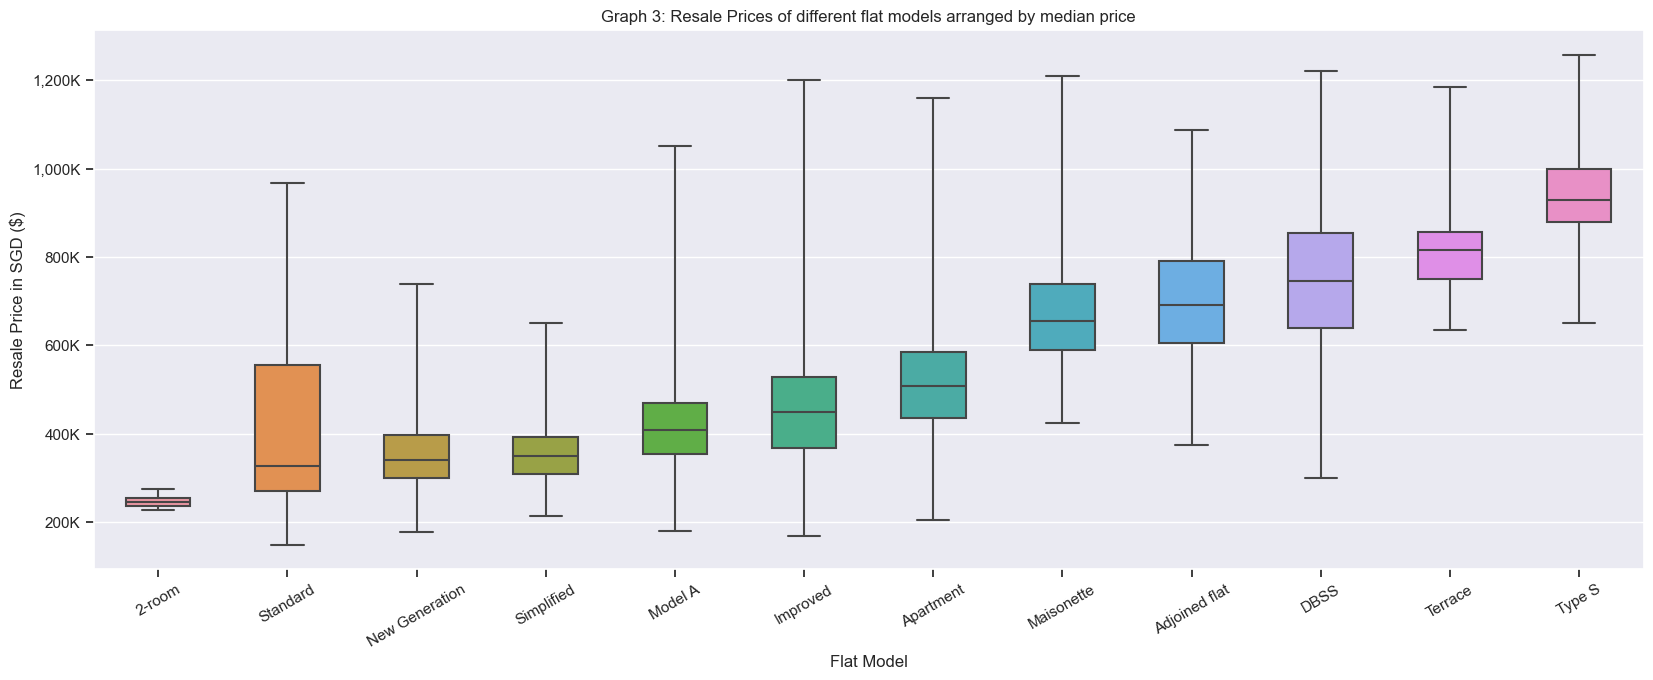

In [39]:
# boxplot to see resale price by flat model

# set size of plot
plt.figure(figsize = (20,7))

# set order of plot - arranged the categories by median price
order_group = df_hdb.groupby("flat_model")["resale_price"].median().sort_values().reset_index()["flat_model"].tolist()

p = sns.boxplot(x = "flat_model", y = "resale_price", data = df_hdb, width = 0.5, order = order_group, whis = (0,100))

# setting the resale price labels on the y-axis
ylabels = ["{:,.0f}".format(x) + "K" for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)

# setting the x-axis label rotation
plt.xticks(rotation = 30)

# set title for graph, both axes label
plt.xlabel("Flat Model")
plt.ylabel("Resale Price in SGD ($)")
plt.title("Graph 3: Resale Prices of different flat models arranged by median price")
plt.show();

In [40]:
# check the number of flats for different flat model
df_hdb["flat_model"].value_counts()

flat_model
Model A           47850
Improved          38305
New Generation    23366
Apartment         20966
Simplified         7238
Standard           4867
Maisonette         4708
DBSS               1639
Type S              369
Adjoined flat       260
Terrace              95
2-room                4
Name: count, dtype: int64

In [41]:
# drop 2-room from df
df_hdb.drop(df_hdb[df_hdb["flat_model"] == "2-room"].index, inplace = True)

# drop adjoined flat from df
df_hdb.drop(df_hdb[df_hdb["flat_model"] == "Adjoined flat"].index, inplace = True)

# check updated value counts for flat model
df_hdb["flat_model"].value_counts()

flat_model
Model A           47850
Improved          38305
New Generation    23366
Apartment         20966
Simplified         7238
Standard           4867
Maisonette         4708
DBSS               1639
Type S              369
Terrace              95
Name: count, dtype: int64

C:\Users\const\AppData\Local\Temp\ipykernel_21596\2208484814.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_terrace.set_yticklabels(ylabels)
C:\Users\const\AppData\Local\Temp\ipykernel_21596\2208484814.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_3room.set_yticklabels(ylabels)
C:\Users\const\AppData\Local\Temp\ipykernel_21596\2208484814.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_4room.set_yticklabels(ylabels)


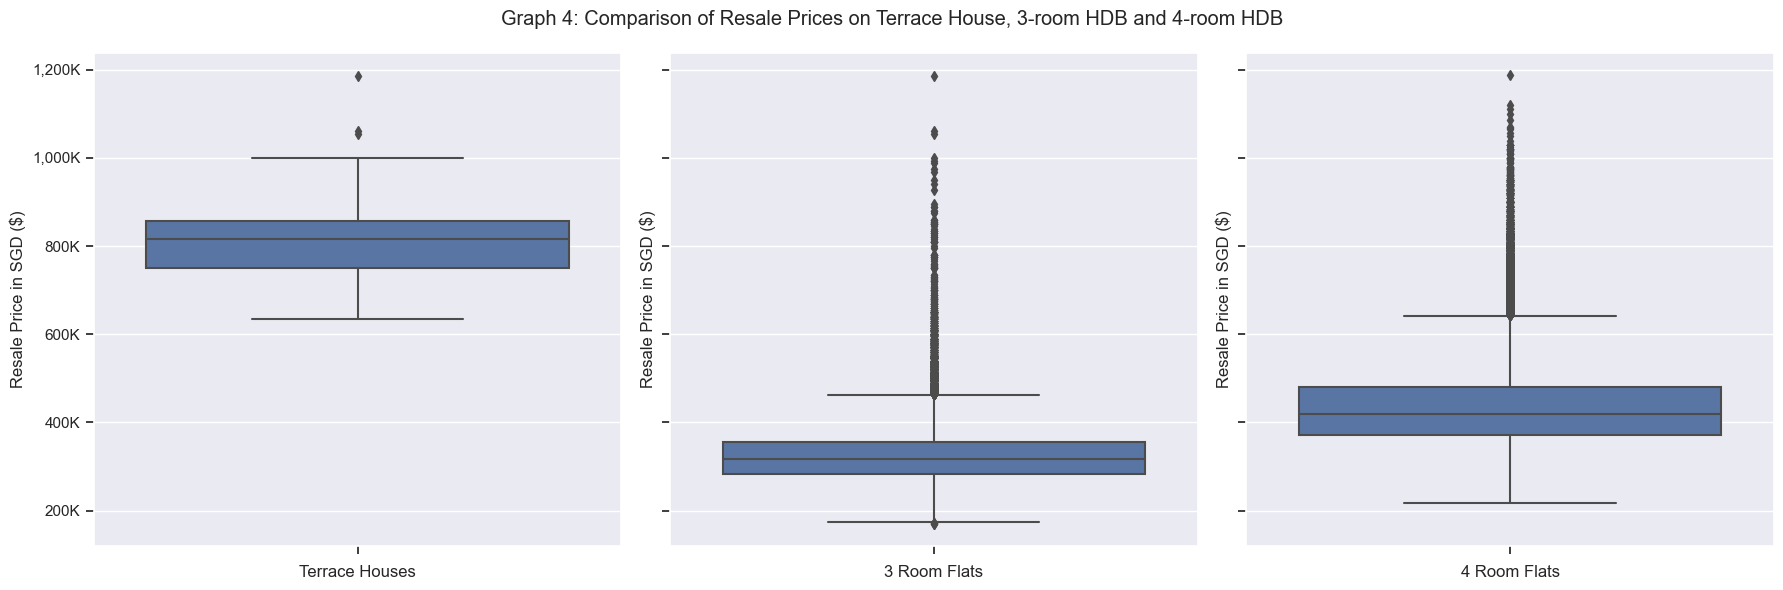

In [42]:
# Terrace Vs 3-room HDB Vs 4-room HDB

# to create the "grid" to put plots side by side
# plt.subplot(total how many rows, total how many columns, plot size)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6), sharey=True) 


# PLOT 1 - plot for terrace HDB resale prices
price_terrace = df_hdb.loc[(df_hdb["flat_model"] == "Terrace")]["resale_price"]

# plotting barplot 
box_terrace = sns.boxplot(y = price_terrace, data = df_hdb, ax = axes[0])

# setting the resale price labels on the y-axis
ylabels = ["{:,.0f}".format(x) + "K" for x in box_terrace.get_yticks()/1000]
box_terrace.set_yticklabels(ylabels)

# setting title of the graphs
box_terrace.set(xlabel = "Terrace Houses", ylabel = "Resale Price in SGD ($)")


# PLOT 2 - plot for 3 room prices
price_3room = df_hdb[(df_hdb["flat_type"] == "3 ROOM")]["resale_price"]

# plotting barplot 
box_3room = sns.boxplot(y = price_3room,  data = df_hdb, ax = axes[1])

# setting the resale price labels on the y-axis
ylabels = ["{:,.0f}".format(x) + "K" for x in box_3room.get_yticks()/1000]
box_3room.set_yticklabels(ylabels)

# setting title of the graphs
box_3room.set(xlabel = "3 Room Flats", ylabel = "Resale Price in SGD ($)")



# PLOT 3 - plot for 4 room prices
price_4room = df_hdb[(df_hdb["flat_type"] == "4 ROOM")]["resale_price"]

# plotting barplot 
box_4room = sns.boxplot(y = price_4room,  data = df_hdb, ax = axes[2])

# setting the resale price labels on the y-axis
ylabels = ["{:,.0f}".format(x) + "K" for x in box_4room.get_yticks()/1000]
box_4room.set_yticklabels(ylabels)

# setting title of the graphs
box_4room.set(xlabel= "4 Room Flats", ylabel = "Resale Price in SGD ($)")

# adjust layout and set overall title
plt.suptitle('Graph 4: Comparison of Resale Prices on Terrace House, 3-room HDB and 4-room HDB')
plt.tight_layout()
plt.show()

In [43]:
# filter to see if outliers in 3 room are due to terrace flat models
df_hdb.loc[(df_hdb["flat_type"] == "3 ROOM") & (df_hdb["resale_price"] > 600000)]["flat_model"].value_counts()

flat_model
Terrace      86
Standard     73
Model A      46
Apartment    26
DBSS         21
Name: count, dtype: int64

In [44]:
# drop them from df
df_hdb.drop(df_hdb[df_hdb["flat_model"] == "Terrace"].index, inplace = True)

print(df_hdb.shape)

(149308, 31)


C:\Users\const\AppData\Local\Temp\ipykernel_21596\1292916603.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_s.set_yticklabels(ylabels)
C:\Users\const\AppData\Local\Temp\ipykernel_21596\1292916603.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_4room.set_yticklabels(ylabels)
C:\Users\const\AppData\Local\Temp\ipykernel_21596\1292916603.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  box_5room.set_yticklabels(ylabels)


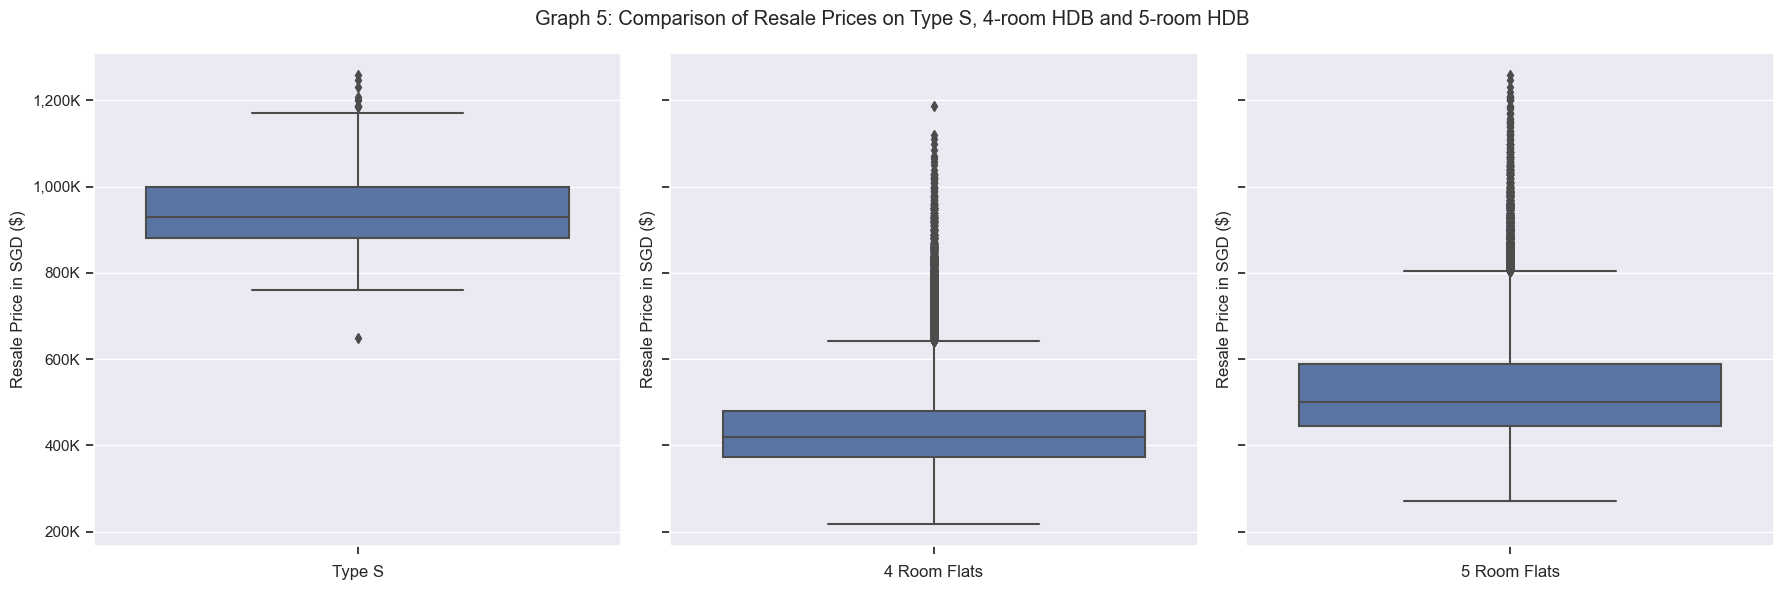

In [45]:
# Type S Vs 4-room HDB Vs 5-room HDB

# to create the "grid" to put plots side by side
# plt.subplot(total how many rows, total how many columns, plot size)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6), sharey=True) 


# PLOT 1 - plot for Type S resale prices
price_s = df_hdb.loc[(df_hdb["flat_model"] == "Type S")]["resale_price"]

# plotting barplot 
box_s = sns.boxplot(y = price_s, data = df_hdb, ax = axes[0])

# setting the resale price labels on the y-axis
ylabels = ["{:,.0f}".format(x) + "K" for x in box_s.get_yticks()/1000]
box_s.set_yticklabels(ylabels)

# setting title of the graphs
box_s.set(xlabel = "Type S", ylabel = "Resale Price in SGD ($)")


# PLOT 2 - plot for 5 room prices
price_4room = df_hdb[(df_hdb["flat_type"] == "4 ROOM")]["resale_price"]

# plotting barplot 
box_4room = sns.boxplot(y = price_4room,  data = df_hdb, ax = axes[1])

# setting the resale price labels on the y-axis
ylabels = ["{:,.0f}".format(x) + "K" for x in box_4room.get_yticks()/1000]
box_4room.set_yticklabels(ylabels)

# setting title of the graphs
box_4room.set(xlabel= "4 Room Flats", ylabel = "Resale Price in SGD ($)")


# PLOT 3 - plot for 5 room prices
price_5room = df_hdb[(df_hdb["flat_type"] == "5 ROOM")]["resale_price"]

# plotting barplot 
box_5room = sns.boxplot(y = price_5room,  data = df_hdb, ax = axes[2])

# setting the resale price labels on the y-axis
ylabels = ["{:,.0f}".format(x) + "K" for x in box_5room.get_yticks()/1000]
box_5room.set_yticklabels(ylabels)

# setting title of the graphs
box_5room.set(xlabel= "5 Room Flats", ylabel = "Resale Price in SGD ($)")


# adjust layout and set overall title
plt.suptitle('Graph 5: Comparison of Resale Prices on Type S, 4-room HDB and 5-room HDB')
plt.tight_layout()
plt.show()

In [46]:
# filter to see if outliers in 4 room are due to Type S flat models
df_hdb.loc[(df_hdb["flat_type"] == "4 ROOM") & (df_hdb["resale_price"] > 600000)]["flat_model"].value_counts()

flat_model
Model A           4493
DBSS               469
Type S             242
Apartment          222
Improved           104
New Generation      58
Maisonette          36
Simplified           6
Standard             4
Name: count, dtype: int64

In [47]:
# filter to see if outliers in 5 room are due to Type S flat models
df_hdb.loc[(df_hdb["flat_type"] == "5 ROOM") & (df_hdb["resale_price"] > 600000)]["flat_model"].value_counts()

flat_model
Improved      5028
Standard       886
DBSS           856
Apartment      588
Model A        487
Maisonette     226
Type S         127
Name: count, dtype: int64

In [48]:
# recategorise the type model into even broader categories
regrouped_values = {"Standard":"standard",
                    "New Generation":"standard",
                    "Simplified":"standard",
                    "Model A":"standard",
                    "Improved":"standard",
                    "Apartment":"standard",
                    "DBSS": "private built",
                    "Type S":"private built",
                    "Maisonette":"maisonette"
                    }

df_hdb = df_hdb.replace({'flat_model': regrouped_values})

# see updated categories of flat models
df_hdb['flat_model'].unique()

array(['standard', 'maisonette', 'private built'], dtype=object)

### 5. Define features/ target and perform train/test/split

In [49]:
# dumify our categorical columns
columns_to_dummify = ["town_region", "tranc_month", "flat_type", "flat_model"]
df_hdb = pd.get_dummies(columns = columns_to_dummify, drop_first = True, data = df_hdb)

In [50]:
# create our X and y variables
exclude_list = ["id", "resale_price"]
features = [col for col in df_hdb.columns if col not in exclude_list]

X = df_hdb[features]
y = df_hdb["resale_price"]

In [51]:
# define our features and target variables
features = ["hdb_age_when_sold","tranc_year","mid_storey","floor_area_sqft","dwelling_density",
            "commercial","multistorey_carpark","precinct_pavilion","rental_units_in_blk","hawker_food_stalls",
            "hawker_nearest_distance","hawker_within_2km","mall_nearest_distance","mall_within_2km","hawker_market_stalls",
            "mrt_nearest_distance","bus_interchange","mrt_interchange","cutoff_point", "affiliation",
            "bus_stop_nearest_distance","pri_sch_nearest_distance","vacancy","pri_sch_affiliation","sec_sch_nearest_dist"] + [col for col in df_hdb if col.startswith(('tranc_month_', 'town_region_', 'flat_type_', 'flat_model_'))]

X = df_hdb[features]
y = df_hdb["resale_price"]

In [52]:
# do train test split
# we will use 0.8 for train and 0.2 for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
# instantiate standard scaler to scale our data
ss = StandardScaler()

# fit and transform our X_train data
continuous_columns = ["hdb_age_when_sold","tranc_year","mid_storey","floor_area_sqft","dwelling_density",
                      "hawker_food_stalls","hawker_nearest_distance","hawker_within_2km","mall_nearest_distance","mall_within_2km",
                      "hawker_market_stalls","mrt_nearest_distance","cutoff_point","bus_stop_nearest_distance","pri_sch_nearest_distance",
                      "vacancy","sec_sch_nearest_dist"] 

X_train[continuous_columns] = ss.fit_transform(X_train[continuous_columns])

# transform our X_test data
X_test[continuous_columns] = ss.transform(X_test[continuous_columns])

In [54]:
X_train.columns

Index(['hdb_age_when_sold', 'tranc_year', 'mid_storey', 'floor_area_sqft',
       'dwelling_density', 'commercial', 'multistorey_carpark',
       'precinct_pavilion', 'rental_units_in_blk', 'hawker_food_stalls',
       'hawker_nearest_distance', 'hawker_within_2km', 'mall_nearest_distance',
       'mall_within_2km', 'hawker_market_stalls', 'mrt_nearest_distance',
       'bus_interchange', 'mrt_interchange', 'cutoff_point', 'affiliation',
       'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'vacancy',
       'pri_sch_affiliation', 'sec_sch_nearest_dist',
       'town_region_east mature', 'town_region_north',
       'town_region_north-east', 'town_region_north-east mature',
       'town_region_west', 'town_region_west mature', 'tranc_month_2',
       'tranc_month_3', 'tranc_month_4', 'tranc_month_5', 'tranc_month_6',
       'tranc_month_7', 'tranc_month_8', 'tranc_month_9', 'tranc_month_10',
       'tranc_month_11', 'tranc_month_12', 'flat_type_3 ROOM',
       'flat_type_4 ROO

### 6. Modelling using Ridge regularization

In [55]:
# set up a list of ridge alphas to check 
# generates 100 values
r_alphas = np.logspace(0, 5, 100)

# instantiate RidgeCV to find optimum alpha value
# use that and fit training data
optimum_ridge_alpha = RidgeCV(alphas = r_alphas, cv = 5)
model_ridgecv = optimum_ridge_alpha.fit(X_train, y_train)

# optimal value of alpha
print(optimum_ridge_alpha.alpha_)

1.0


In [56]:
# get the R2 scores for training and testing sets
train_score_ridgecv = model_ridgecv.score(X_train, y_train)
test_score_ridgecv = model_ridgecv.score(X_test, y_test)

In [57]:
# instantiate ridge regression
model_ridge = Ridge(alpha = optimum_ridge_alpha.alpha_)

# obtain cross-validation scores
scores_r = cross_val_score(model_ridge, X_train, y_train)

# obtain MEAN cross-validation score
cv_score_ridge = scores_r.mean()

print(f"Training R2 score for Ridge: {train_score_ridgecv}")
print(f"Test R2 score for Ridge: {test_score_ridgecv}")
print(f"Cross validation score for Ridge: {cv_score_ridge}")

Training R2 score for Ridge: 0.8477317877879044
Test R2 score for Ridge: 0.846568885960398
Cross validation score for Ridge: 0.84752567626707


In [58]:
# generate the coefficients of the features for ridge regularisation
coefficients_ridgecv = abs(model_ridgecv.coef_)
(coefficients_ridgecv).shape

(48,)

In [59]:
# create a list of tuples by merging feature name and coefficient
ridgecv_list = list(zip(features, coefficients_ridgecv))

# show the list sorted by coefficient values in descending order
sorted(ridgecv_list, key = lambda x: x[1], reverse=True)

[('town_region_north', 161863.955051449),
 ('town_region_west', 140494.10660464806),
 ('town_region_north-east', 98489.13407451715),
 ('flat_type_EXECUTIVE', 95608.48699155048),
 ('flat_model_private built', 89352.99225119049),
 ('town_region_east mature', 84658.64109987015),
 ('floor_area_sqft', 75823.07629533992),
 ('flat_type_5 ROOM', 66905.19759080782),
 ('town_region_north-east mature', 56447.17334176893),
 ('multistorey_carpark', 54829.09070923846),
 ('flat_model_standard', 54399.86855219601),
 ('flat_type_4 ROOM', 50387.851297751964),
 ('hdb_age_when_sold', 46583.96915466795),
 ('flat_type_3 ROOM', 31622.674045956057),
 ('town_region_west mature', 29278.129641628784),
 ('precinct_pavilion', 27995.140261293072),
 ('mid_storey', 23607.18874375114),
 ('mrt_nearest_distance', 20069.552048778656),
 ('hawker_nearest_distance', 18194.20298826355),
 ('hawker_market_stalls', 12741.806491751806),
 ('rental_units_in_blk', 10483.563819165005),
 ('hawker_within_2km', 10163.375512427916),
 ('

### 7. Saving the trained model into a .pkl file

In [60]:
# save it in a pkl file
import joblib

joblib.dump(model_ridgecv, "./trained.pkl")

['./trained.pkl']